In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/GOOG-year.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,879.093372,884.680774,873.167521,879.446549,879.446549,1.554527e+06
std,74.405990,75.014245,73.978346,74.622152,74.622152,6.822470e+05
min,744.590027,754.000000,727.539978,736.080017,736.080017,5.874000e+05
25%,809.097504,815.692520,804.339981,812.642487,812.642487,1.125100e+06
50%,908.409973,915.477508,904.200012,907.984985,907.984985,1.351950e+06
75%,938.899994,943.401749,930.144989,940.750000,940.750000,1.710100e+06
max,1017.210022,1048.390015,1016.950012,1025.500000,1025.500000,5.167700e+06


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) 
df_minmax = minmax.transform(df.iloc[:, 4:5].astype('float32')) 
df_minmax = pd.DataFrame(df_minmax)


std = StandardScaler().fit(df.iloc[:, 4:5].astype('float32')) 
df_std = std.transform(df.iloc[:, 4:5].astype('float32')) 
df_std = pd.DataFrame(df_std)

rbst = RobustScaler().fit(df.iloc[:, 4:5].astype('float32')) 
df_rbst = rbst.transform(df.iloc[:, 4:5].astype('float32')) 
df_rbst = pd.DataFrame(df_rbst)

print('Standard Scaling         Mean: %.4f, StandardDeviation: %.3f' % (np.mean(df_std[0].values), np.sqrt(df_std.var()[0])))
print('MinMax Scaling           Mean: %.4f, StandardDeviation: %.3f' % (np.mean(df_minmax[0].values), np.sqrt(df_minmax.var()[0])))
print('Robust Scaling           Mean: %.3f, StandardDeviation: %.3f' % (np.mean(df_rbst[0].values), np.sqrt(df_rbst.var()[0])))

Standard Scaling         Mean: 0.0000, StandardDeviation: 1.002
MinMax Scaling           Mean: 0.4954, StandardDeviation: 0.258
Robust Scaling           Mean: -0.223, StandardDeviation: 0.582


In [7]:
ma_day = [10, 20, 30, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()
    df_minmax[column_name] = df_minmax[0].rolling(ma).mean()
    df_std[column_name] = df_std[0].rolling(ma).mean()
    df_rbst[column_name] = df_rbst[0].rolling(ma).mean()

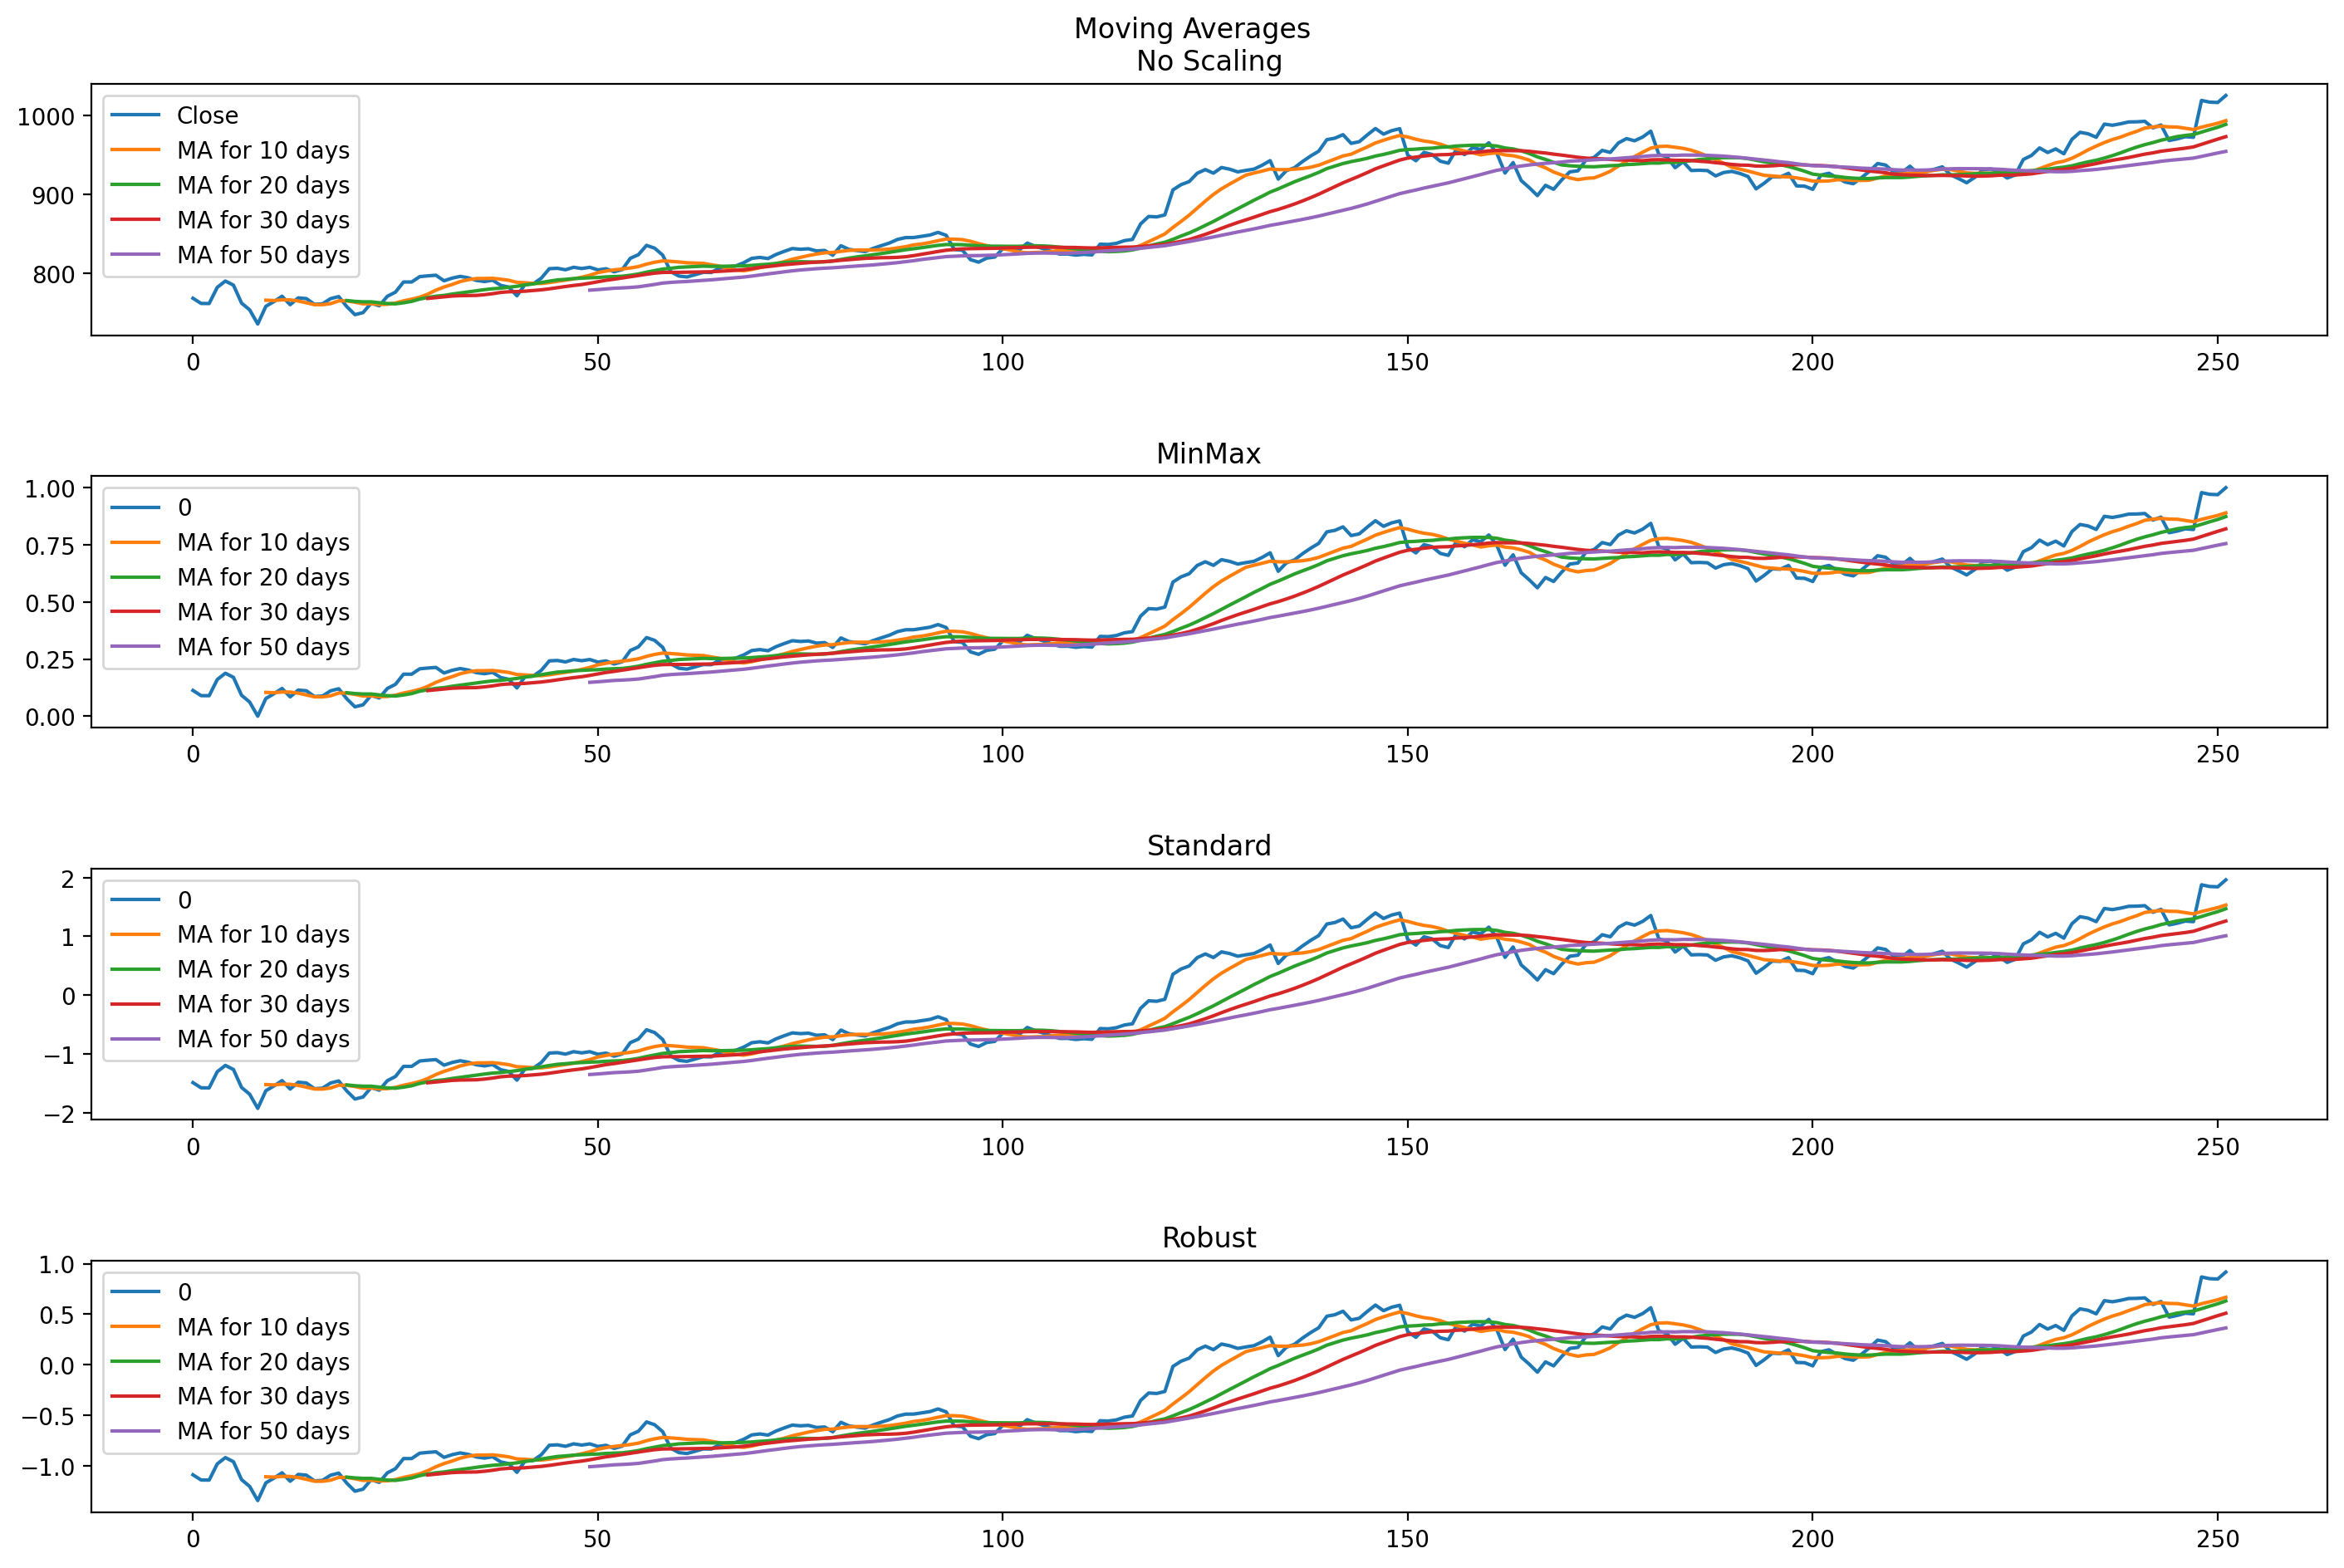

In [8]:
fig, ax = plt.subplots(4, dpi=200, figsize=(15, 10))
fig.tight_layout(pad=4)

fig.suptitle('Moving Averages')
df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=ax[0])
ax[0].title.set_text('No Scaling')

df_minmax[[0, 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=ax[1])
ax[1].title.set_text('MinMax')

df_std[[0, 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=ax[2])
ax[2].title.set_text('Standard')

df_rbst[[0, 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=ax[3])
ax[3].title.set_text('Robust')

plt.show()